<a href="https://www.kaggle.com/code/sanskrutikunjir/eda-notebook-sanskruti-kunjir?scriptVersionId=105480427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***About Dataset:***
Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

This dataset containing information of food restraunts in banglaore who are working with Zomato.The data was scraped from Zomato in two phase. After going through the structure of the website I found.

for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars. So, here we are trying to find the best restaurants for customer depends on their need.

# ***Exploratory Analysis:***
To begin this exploratory analysis, first to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


# ***Data cleaning:-***
* Deleting redundant columns
* Renaming the columns
* Dropping duplicates
* Cleaning the individual columns
* Remove the NaN values from the dataset
* Check for some more transformations

### **Reading CSV:**

In [2]:
df=pd.read_csv('../input/zomato-eda/zomato.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=51717, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### **Droping the unnecessary columns:-**
* Unnecessary column are those columns which are not required for analysis.
* so we can drop those columns
* eg:-Columns such as Url,address,Phone,menu item,dish liked

In [7]:
df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis=1,inplace=True)
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


### **Checking the null values by columns:-**
Here we will get to know the count of null value column by column.

In [9]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [10]:
df.isnull().sum().sum() #Total null/NaN values

8414

### **Renaming columns:-**
Changing the names of columns for better understanding

In [11]:
df.rename(columns={'name':'restaurants','book_table':'booking','listed_in(city)':'city','rate':'rating','approx_cost(for two people)':'cost','listed_in(type)':'types'},inplace=True)
df.head(3)

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


### **Droping NaN values:-**
Droping out NaN values helps for getting better result and understanding.

In [12]:
len(df)

51717

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().values.any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   booking       43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   cuisines      43533 non-null  object
 8   cost          43533 non-null  object
 9   types         43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


### **Finding out the duplicate rows:-**
* Helps to find the same repeated rows.
* Then removing the duplicate rows for understanding the data.

In [16]:
df[df.duplicated()].count().sum()

125750

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
#Shows the count or rows and columns after removing the duplicates
df.shape

(30958, 10)

In [19]:
#showing number of duplicate count after removing it
df[df.duplicated()].count().sum()

0

### **Cleaning individual columns**:-

***column:-ratings***


In [20]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
def rate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=value.split('/')
        value=value[0]
        return float(value)
    
df['rating']=df['rating'].apply(rate)
df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        29638 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  object 
 9   types         30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [23]:
#Counting the NaN valuesn in rating column
df['rating'].isnull().sum()

1320

In [24]:
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['rating'].isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  object 
 9   types         30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


***column:-location***

In [26]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [27]:
df['location'].isnull().sum()

0

In [28]:
a=df['location'].value_counts(ascending=False)
a

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

***column:-cost***

In [29]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [30]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

df['cost']=df['cost'].apply(money)

In [31]:
df.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [32]:
df['cost'].isnull().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


***column:-booking***

In [34]:
df['booking'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df['booking'].isnull().sum()

0

***column:-online order***

In [36]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df['online_order'].isnull().sum()

0

***column:-rest type***

In [38]:
df['rest_type'].isnull().any()

False

In [39]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [40]:
b=df['rest_type'].value_counts(ascending=False)
b

Quick Bites                   10143
Casual Dining                  7311
Cafe                           2495
Dessert Parlor                 1357
Delivery                       1117
                              ...  
Dessert Parlor, Kiosk             2
Bakery, Food Court                2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: rest_type, Length: 87, dtype: int64

***Column:-listed in type***

In [41]:
df['types'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [42]:
c=df['types'].value_counts()
c

Delivery              14159
Dine-out              11354
Desserts               2117
Cafes                  1184
Drinks & nightlife      894
Buffet                  665
Pubs and bars           585
Name: types, dtype: int64

In [43]:
df['types'].isnull().sum()

0

***column:-cuisines***

In [44]:
d=df['cuisines'].value_counts()
d

North Indian                                                  1602
North Indian, Chinese                                         1401
South Indian                                                   902
Bakery, Desserts                                               471
Biryani                                                        429
                                                              ... 
Bakery, Fast Food, Burger, Rolls, Beverages                      1
Fast Food, Kerala, Mangalorean, Seafood, South Indian            1
Pizza, American                                                  1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, Arabian, Momos                            1
Name: cuisines, Length: 2487, dtype: int64

In [45]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

***column:-restaurants***

In [46]:
df.groupby('restaurants').count().head()

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurants,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2,2


In [47]:
# df.groupby('restaurants').count().head()

In [48]:
df['restaurants']=df['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [49]:
df.groupby('restaurants').count().head()

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurants,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100C,2,2,2,2,2,2,2,2,2


### **Checking NaN values after cleaning individual columns:**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


In [51]:
df.isnull().sum()

restaurants     0
online_order    0
booking         0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
types           0
dtype: int64

In [52]:
df.shape

(30958, 10)

In [53]:
df.to_csv('./clean_zomato.csv')

# ***Data visualization:-***
* Restaurants delivering Online or not
* Table booking Rate vs Rate
* Best Location
* Relation between Location and Rating
* Cost of Restaurant
* No. of restaurants in a Location
* Restaurant type
* Most famous restaurant chains in Bengaluru

,rest_type
Quick Bites,10143
Casual Dining,7311
Cafe,2495
Dessert Parlor,1357
Delivery,1117
"Takeaway, Delivery",965
"Casual Dining, Bar",940
Bakery,547
Bar,456
Beverage Shop,417


Text(0.5, 1.0, 'Restaurant types')

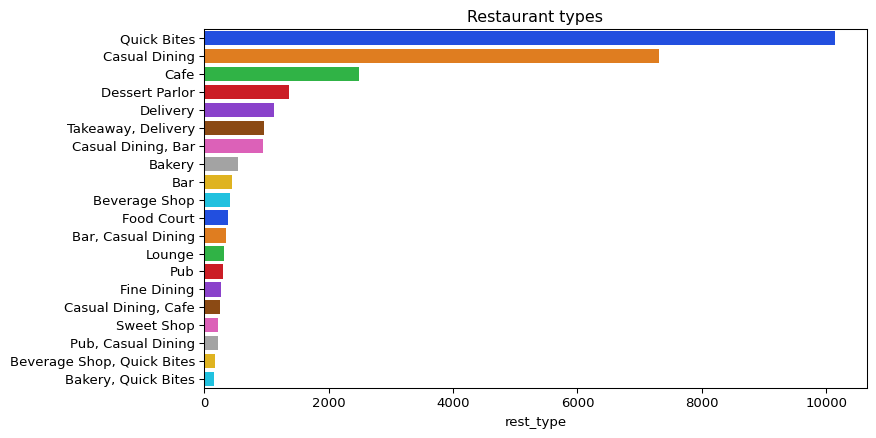

In [54]:
#Restaurant type
type1=df['rest_type'].value_counts().head(20)
display(type1.to_frame())
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(x=type1,y= type1.index ,palette='bright')
plt.title('Restaurant types')

* In this graph it shows that the types of restaurants in Banglore and among all of them we have ploted first 20 restaurant types.
* Here the top 3 restaurant types are:
1. Quick bites
2. Casual dining
3. Cafe

Text(0.5, 1.0, 'Online delivery')

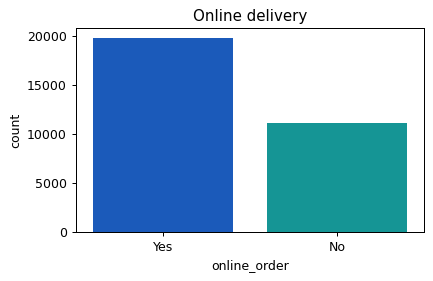

In [55]:
#Restaurants delivering Online or not
plt.figure(figsize=(5,3), dpi=90)
sns.countplot(x='online_order',data=df,palette='winter')
plt.title('Online delivery')

* Here we have plotted count plot for checking whether the restaurants are delivering online or not.
* So by the observations we concluded that:-
1. 2000 restaurants are delivering online foods
2. 1000 restaurants are not delivering online foods

<AxesSubplot:title={'center':'Online order vs rating'}, xlabel='online_order', ylabel='rating'>

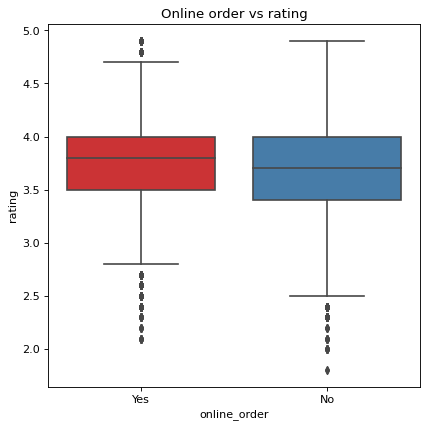

In [56]:
#Online order vs rating
plt.figure(figsize=(6,6),dpi=80)
plt.title('Online order vs rating')
sns.boxplot(x='online_order',y='rating',data=df,palette='Set1')

* The restaurants which have the online order have the maximum rating but the restaurants which dont have has the lowest rating.
* Average rating of online order is higher.

<AxesSubplot:title={'center':'Booking vs rating'}, xlabel='booking', ylabel='rating'>

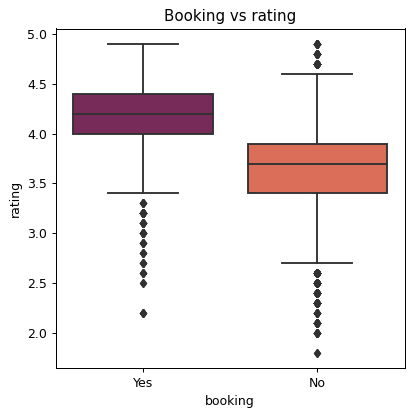

In [57]:
#Booking vs rating
plt.figure(figsize=(5,5),dpi=90)
plt.title('Booking vs rating')
sns.boxplot(x='booking',y='rating',data=df,palette='rocket')

* The restaurants which accepts booking have the highest rating while the restaurants having the lowest rating.
* If particular restaurants want high ratings they should start taking bookings.

,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
Koramangala 4th Block,591240
Church Street,555228
JP Nagar,479180


AxesSubplot(0.125,0.125;0.775x0.755)


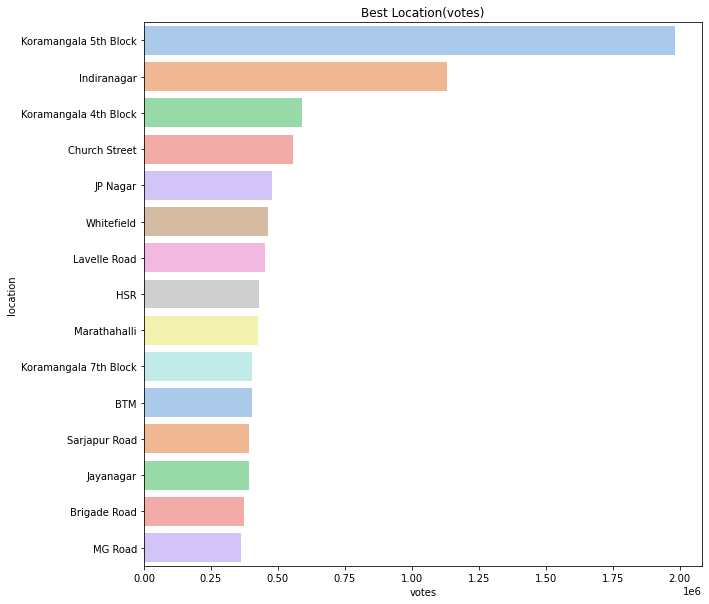

In [58]:
#Best location(votes)
loc_vote=df.loc[:,['location','votes']]
loc_vote=df.groupby('location')['votes'].sum()
loc_vote=loc_vote.to_frame()
loc_vote=loc_vote.sort_values("votes",ascending=False)
display(loc_vote.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_vote.index[:15],x=loc_vote['votes'][:15],palette='pastel',orient='h')
plt.title('Best Location(votes)')
print(pt)

* Here we have plotted bar plot for the locations of restaurants in banglore in considaration with votes.
* Graphs shows that the which location has more number of restaurants and which has the lowest.
* Top 3 restaurants are:
1. koramangla 5th blockkoramangla 5th block
2. indiranagarindiranagar
3. koramangla 4th blockkoramangla 4th block

,rating
location,
BTM,8088.404764
Koramangala 5th Block,6450.055544
Indiranagar,6372.199480
Whitefield,5923.755024
HSR,5781.562278


AxesSubplot(0.125,0.125;0.775x0.755)


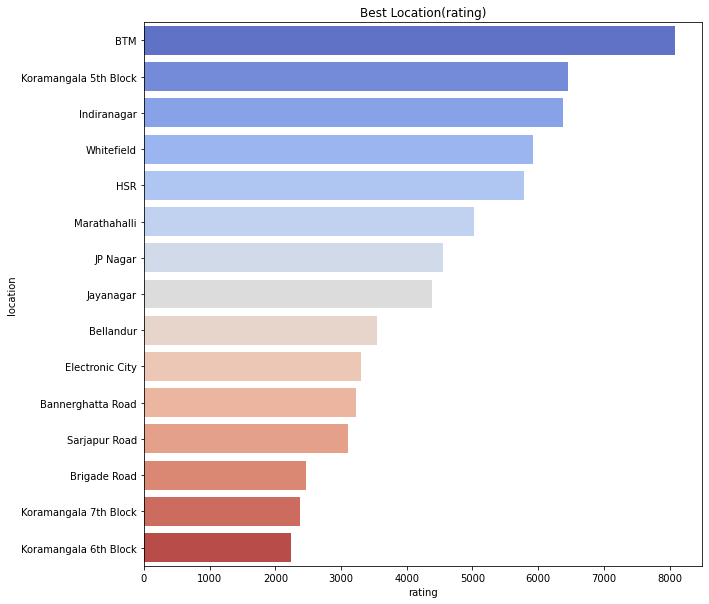

In [59]:
#Best location(ratings)
loc_rate=df.loc[:,['location','rating']]
loc_rate=df.groupby('location')['rating'].sum()
loc_rate=loc_rate.to_frame()
loc_rate=loc_rate.sort_values("rating",ascending=False)
display(loc_rate.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_rate.index[:15],x=loc_rate['rating'][:15],palette='coolwarm',orient='h')
plt.title('Best Location(rating)')
print(pt)

* Here we have plotted bar plot for the locations of restaurants in banglore in considaration with ratings.
* Graphs shows that the which location has more number of restaurants and which has the lowest.
* Top 3 restaurants are:
1. BTM
2. koramangla 5th blockkoramangla 5th block
3. indiranagarindiranagar

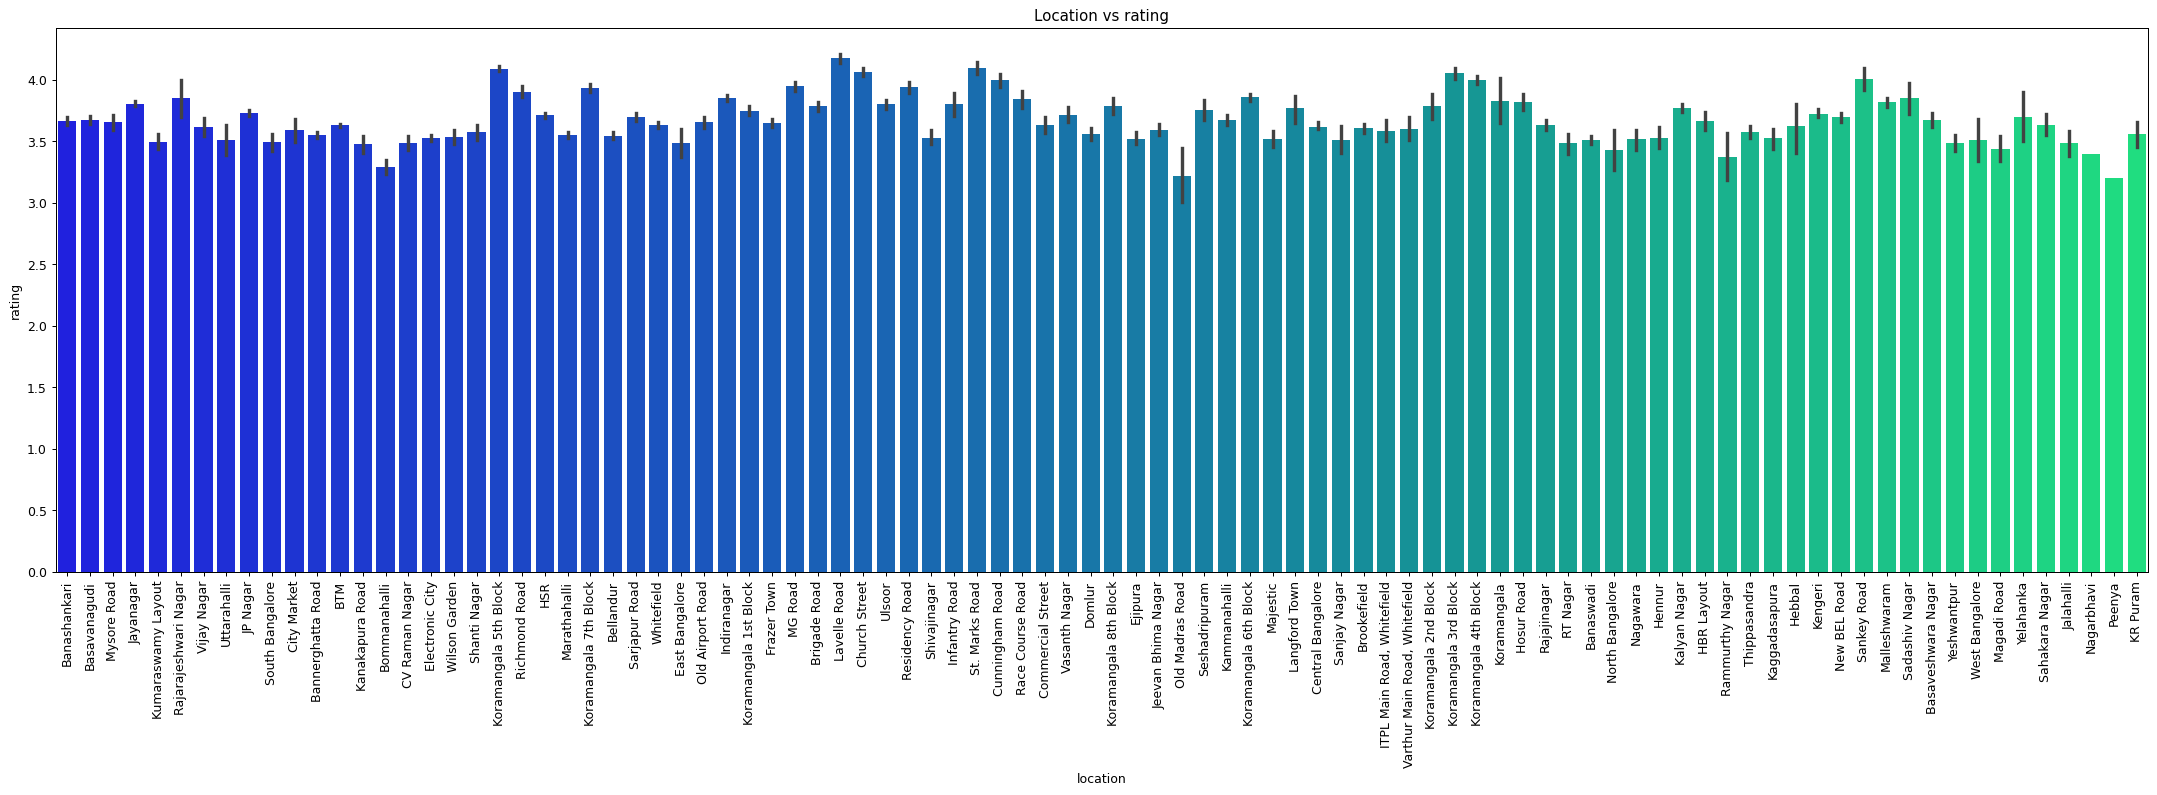

In [60]:
#Relation between Location and Rating
plt.figure(figsize=(30,8),dpi=90)
plt.title('Location vs rating')
sns.barplot(x=df['location'],y=df['rating'],data=df,palette='winter')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


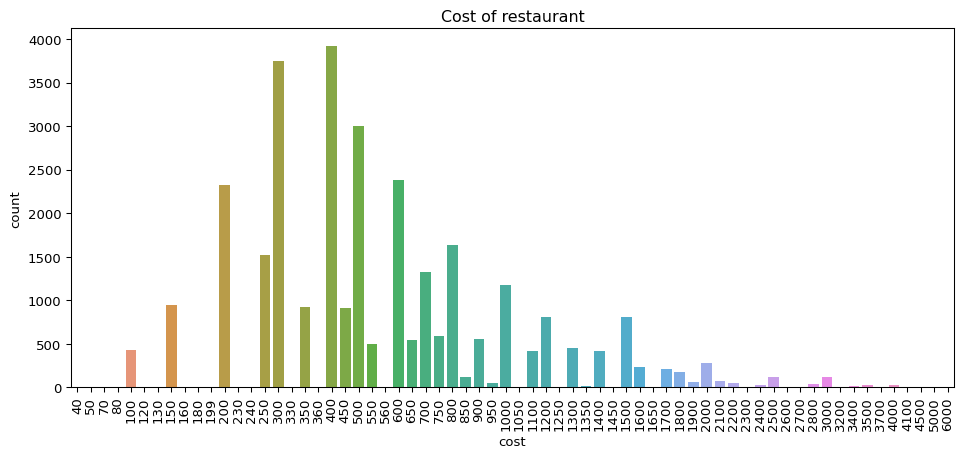

In [61]:
#Cost of Restaurant
plt.figure(figsize=(12,5),dpi=95)
sns.countplot(df['cost'])
plt.xticks(rotation=90)
plt.title('Cost of restaurant')
plt.show()

* Graph shows that the maximum cost of restaurant is 300 and 400 and they are maximum in number.
* Restaurants costs between 100 to 3000

,votes
restaurants,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7861.666667
Church Street Social,7561.727273
Truffles,7285.292683
Hoot,7257.000000


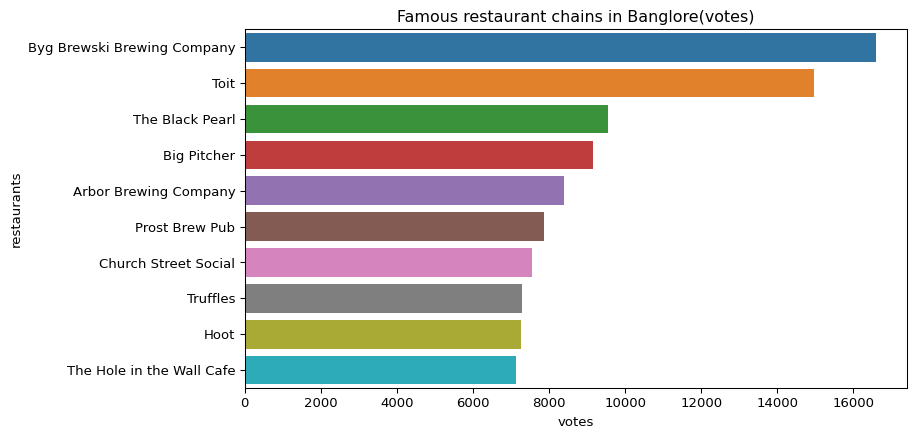

In [62]:
#Most famous restaurant chains in Bengaluru(votes)
vote=df.groupby('restaurants')['votes'].agg('mean').sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=vote.index,x=vote,orient='h')
plt.title('Famous restaurant chains in Banglore(votes)')
display(vote.to_frame())
plt.show()

* Here the graph is according to the famous restaurants in banglore with respect to votes.
* So according to votes Byg Brewski Brewing Company has the highest vote and vice versa the Hole in the Wall Cafe has the lowest votes.



,rating
restaurants,
Byg Brewski Brewing Company,4.900000
SantSpa Cuisine,4.900000
Asia Kitchen By Mainland China,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.852381
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.783333


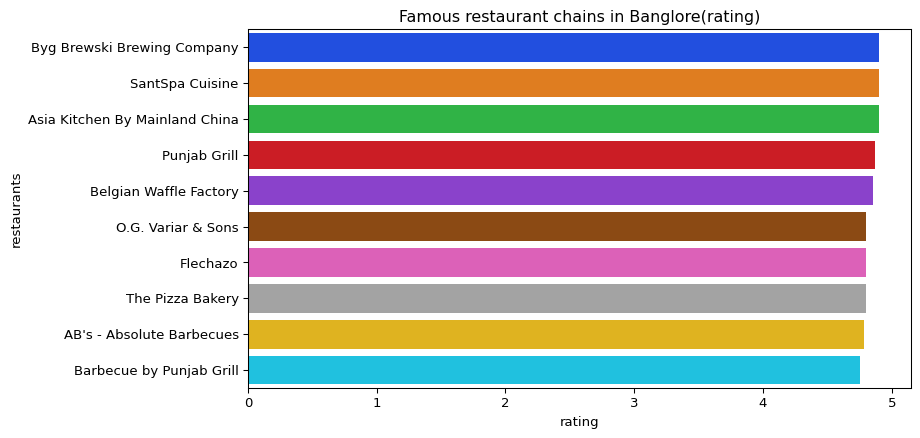

In [63]:
#Most famous restaurant chains in Bengaluru(rating)
rate=df.groupby('restaurants')['rating'].agg('mean').sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=rate.index,x=rate,orient='h',palette='bright')
plt.title('Famous restaurant chains in Banglore(rating)')
display(rate.to_frame())
plt.show()

* Here the graph is according to the famous restaurants in banglore with respect to ratings.
* So according to graph Byg Brewski Brewing Company has the highest rating.


,restaurants
Cafe Coffee Day,82
Onesta,81
Empire Restaurant,68
Kanti Sweets,60
Just Bake,56
Pizza Hut,55
KFC,54
Domino's Pizza,54
Five Star Chicken,54
Smally's Resto Cafe,53


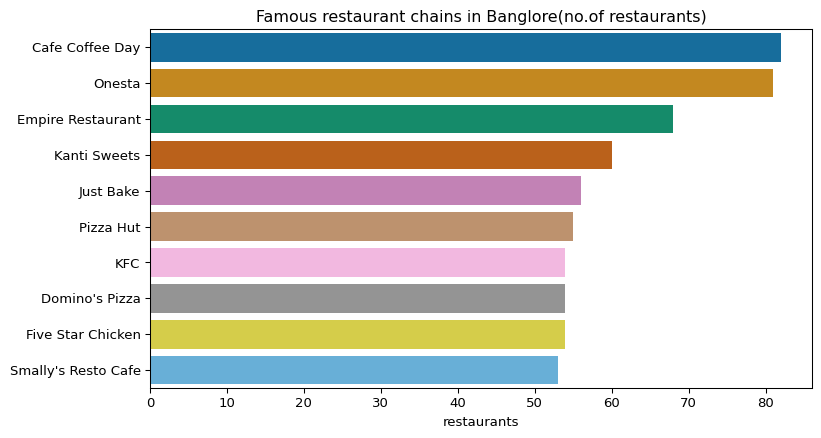

In [64]:
#Most famous restaurant chains in Bengaluru(no of restaurants)
hotels=df['restaurants'].value_counts().head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=hotels.index,x=hotels,orient='h',palette='colorblind')
plt.title('Famous restaurant chains in Banglore(no.of restaurants)')
display(hotels.to_frame())
plt.show()

* Here the graph is according to the famous restaurants in banglore with respect to no of restaurants.
* Top 3 are:-
1. cafe coffee day
2. onesta
3. empire restaurant